In [ ]:
# Import 3rd party dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

!pip install imblearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
from imblearn.over_sampling import SMOTE
from torch.autograd.functional import hessian
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    confusion_matrix,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import warnings
from IPython.display import display, HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from google.colab import files
import pickle

In [ ]:
# Suppressing Warnings and Adjusting Display Width
# We ignore any warning messages that might arise during execution to maintain clean output.
# Additionally, we adjust the display width to ensure that the content is fully visible within the Jupyter notebook.

warnings.filterwarnings("ignore")
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load the data, exploratory data analysis, and data splitting

In this demo we will use a preprocessed version of Heart Disease dataset.

In [ ]:
# Load the data
!wget -O "WBCD_(preprocessed).csv" "https://drive.google.com/uc?export=download&id=1v5voZvCHRJ8xq8-A3816bHiH6Xe37uQC"
dataset_df = pd.read_csv("WBCD_(preprocessed).csv")

--2024-08-22 18:00:21--  https://drive.google.com/uc?export=download&id=1v5voZvCHRJ8xq8-A3816bHiH6Xe37uQC
Resolving drive.google.com (drive.google.com)... 173.194.193.102, 173.194.193.139, 173.194.193.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.193.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1v5voZvCHRJ8xq8-A3816bHiH6Xe37uQC&export=download [following]
--2024-08-22 18:00:21--  https://drive.usercontent.google.com/download?id=1v5voZvCHRJ8xq8-A3816bHiH6Xe37uQC&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.152.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338338 (330K) [application/octet-stream]
Saving to: ‘WBCD_(preprocessed).csv’

WBCD_(preprocessed) 100%[===================>] 330

In [ ]:
# Print the data table
dataset_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.175765,-2.119335,1.356182,1.183044,1.617438,2.539170,2.645094,2.618669,2.346470,2.509500,...,-1.373950,2.437423,2.285616,1.343665,2.639583,2.244217,2.294058,2.441770,2.223290,1
1,1.948215,-0.354563,1.794412,2.247419,-0.842254,-0.497751,-0.000497,0.574439,0.017867,-0.924636,...,-0.369723,1.630108,2.285616,-0.376766,-0.442998,-0.137513,1.086129,-0.234202,0.355002,1
2,1.684743,0.476480,1.668584,1.844594,0.974381,1.147670,1.494761,2.108475,1.003783,-0.407334,...,-0.019565,1.432973,1.806162,0.546173,1.222372,0.919909,1.953282,1.367854,0.264964,1
3,-0.791286,0.268719,-0.605877,-0.830754,2.735115,2.539170,2.090157,1.505277,2.519101,2.515733,...,0.140649,-0.245179,-0.593316,2.593666,2.639583,2.117610,2.173873,2.441770,2.480274,1
4,1.864383,-1.173665,1.889869,2.152444,0.294787,0.598926,1.502880,1.481362,0.006358,-0.588078,...,-1.482962,1.423586,1.524439,0.232553,-0.314193,0.664669,0.728618,-0.950765,-0.410321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.244620,0.748718,2.189254,2.248401,1.076686,0.256721,2.123987,2.400773,-0.312051,-0.993194,...,0.124132,1.858534,2.285616,0.393844,-0.270091,0.718857,1.627719,-1.515105,-0.762345,1
565,1.816479,2.148117,1.720651,2.034544,0.112101,0.003611,0.772166,1.311563,-0.212308,-1.133426,...,2.081385,1.511201,1.852415,-0.699347,-0.403797,0.267123,0.733182,-0.564638,-1.061221,1
566,0.759601,2.107520,0.727038,0.715046,-0.856138,-0.018663,0.075416,0.118719,-0.833781,-0.954240,...,1.399237,0.625658,0.576253,-0.820315,0.416638,0.362331,0.413705,-1.221797,-0.321534,1
567,1.957196,2.406027,2.106815,2.047644,1.573593,2.539170,2.645094,2.748874,2.262073,1.177292,...,2.274632,2.437423,2.041631,1.469113,2.639583,2.616948,2.287972,2.247778,2.480274,1


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [ ]:
dataset_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-2.372638e-15,-6.449830e-15,-1.635872e-15,8.741299e-17,5.244779e-15,-8.616423e-16,-2.497514e-16,1.111394e-15,-2.172837e-15,4.117776e-15,...,1.367389e-15,-9.115926e-16,1.773235e-15,-5.881645e-15,-1.760747e-15,7.867169e-16,-1.998011e-16,-3.371644e-15,7.867169e-16,0.372583
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.483918
min,-2.120318e+00,-2.279334e+00,-2.071998e+00,-1.625269e+00,-2.798096e+00,-1.697697e+00,-1.176405e+00,-1.290160e+00,-2.667508e+00,-1.970146e+00,...,-2.250998e+00,-1.761555e+00,-1.397487e+00,-2.675156e+00,-1.558216e+00,-1.361043e+00,-1.743529e+00,-2.434013e+00,-1.769645e+00,0.000000
25%,-7.074546e-01,-7.366516e-01,-7.104453e-01,-7.187485e-01,-7.231422e-01,-7.755647e-01,-7.764069e-01,-7.504705e-01,-7.225297e-01,-7.641476e-01,...,-7.545668e-01,-7.070382e-01,-7.034819e-01,-6.993474e-01,-7.188101e-01,-7.811828e-01,-7.557349e-01,-6.908719e-01,-7.429619e-01,0.000000
50%,-2.074582e-01,-9.904128e-02,-2.301270e-01,-2.903785e-01,-2.893319e-02,-2.144694e-01,-3.436618e-01,-3.999780e-01,-5.885845e-02,-1.658226e-01,...,-3.938511e-02,-2.830412e-01,-3.435498e-01,-4.074466e-02,-2.658909e-01,-2.129707e-01,-2.232725e-01,-1.005431e-01,-2.064855e-01,0.000000
75%,5.140933e-01,6.078226e-01,5.448038e-01,4.681115e-01,6.601606e-01,5.503293e-01,5.921935e-01,6.762121e-01,5.741228e-01,5.478046e-01,...,6.724932e-01,5.849791e-01,4.921571e-01,6.178581e-01,6.245470e-01,5.780697e-01,7.118836e-01,5.621847e-01,5.463323e-01,1.000000
max,2.346415e+00,2.624534e+00,2.427678e+00,2.248401e+00,2.735115e+00,2.539170e+00,2.645094e+00,2.816236e+00,2.519101e+00,2.515733e+00,...,2.813083e+00,2.523005e+00,2.285616e+00,2.593666e+00,2.639583e+00,2.616948e+00,2.683516e+00,2.441770e+00,2.480274e+00,1.000000


In [ ]:
predictor_columns = [col for col in dataset_df.columns if col != "diagnosis"]

# Count the number of predictor columns
num_predictor_columns = len(predictor_columns)

In [ ]:
# Normalize each predictor attribute using z-score
for predictor in predictor_columns:
    dataset_df[predictor] = (dataset_df[predictor] - dataset_df[predictor].mean()) / dataset_df[predictor].std()

In [ ]:
# Generate descriptive statistics for the dataset

dataset_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-6.243785e-18,2.185325e-17,0.000000,-1.248757e-17,0.000000,2.497514e-17,-2.497514e-17,-2.497514e-17,3.746271e-17,3.121893e-18,...,1.248757e-17,-2.497514e-17,0.000000,-4.995028e-17,1.248757e-17,-2.497514e-17,2.497514e-17,-1.248757e-17,-1.248757e-17,0.372583
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.483918
min,-2.120318e+00,-2.279334e+00,-2.071998,-1.625269e+00,-2.798096,-1.697697e+00,-1.176405e+00,-1.290160e+00,-2.667508e+00,-1.970146e+00,...,-2.250998e+00,-1.761555e+00,-1.397487,-2.675156e+00,-1.558216e+00,-1.361043e+00,-1.743529e+00,-2.434013e+00,-1.769645e+00,0.000000
25%,-7.074546e-01,-7.366516e-01,-0.710445,-7.187485e-01,-0.723142,-7.755647e-01,-7.764069e-01,-7.504705e-01,-7.225297e-01,-7.641476e-01,...,-7.545668e-01,-7.070382e-01,-0.703482,-6.993474e-01,-7.188101e-01,-7.811828e-01,-7.557349e-01,-6.908719e-01,-7.429619e-01,0.000000
50%,-2.074582e-01,-9.904128e-02,-0.230127,-2.903785e-01,-0.028933,-2.144694e-01,-3.436618e-01,-3.999780e-01,-5.885845e-02,-1.658226e-01,...,-3.938511e-02,-2.830412e-01,-0.343550,-4.074466e-02,-2.658909e-01,-2.129707e-01,-2.232725e-01,-1.005431e-01,-2.064855e-01,0.000000
75%,5.140933e-01,6.078226e-01,0.544804,4.681115e-01,0.660161,5.503293e-01,5.921935e-01,6.762121e-01,5.741228e-01,5.478046e-01,...,6.724932e-01,5.849791e-01,0.492157,6.178581e-01,6.245470e-01,5.780697e-01,7.118836e-01,5.621847e-01,5.463323e-01,1.000000
max,2.346415e+00,2.624534e+00,2.427678,2.248401e+00,2.735115,2.539170e+00,2.645094e+00,2.816236e+00,2.519101e+00,2.515733e+00,...,2.813083e+00,2.523005e+00,2.285616,2.593666e+00,2.639583e+00,2.616948e+00,2.683516e+00,2.441770e+00,2.480274e+00,1.000000


In [ ]:
# Split dataset into training and test sets
train_df, test_df = train_test_split(dataset_df, test_size=0.1, random_state=42)

# Separate target variable from features
y_train = train_df["diagnosis"]
X_train = train_df.drop("diagnosis", axis=1)
y_test = test_df["diagnosis"]
X_test = test_df.drop("diagnosis", axis=1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Store the mean, standard deviation, and normalized PDF using KDE for each predictor attribute and class
predictor_info = {}
column_index_map = {}
for i, col_name in enumerate(predictor_columns):
    column_index_map[i] = col_name
    pdf_all = gaussian_kde(X_train[col_name])
    pdf0 = gaussian_kde(X_train[dataset_df['diagnosis'] == 0][col_name])
    pdf1 = gaussian_kde(X_train[dataset_df['diagnosis'] == 1][col_name])
    predictor_info[i] = {
        'mean': X_train[col_name].mean(),
        'std': X_train[col_name].std(),
        'pdf': pdf_all,
        'pdf0': pdf0,
        'pdf1': pdf1
    }



In [ ]:
from scipy.stats import norm, entropy, gaussian_kde

def JSD(p, q):
    m = 0.5 * (p + q)
    return 0.5 * entropy(p, m) + 0.5 * entropy(q, m)

In [ ]:
# Define the x values where you want to evaluate the PDF
x = np.linspace(-3, 3, 100)

# Calculate the uniform PDF along x
uniform_prior_x = 1/6*np.ones(100)

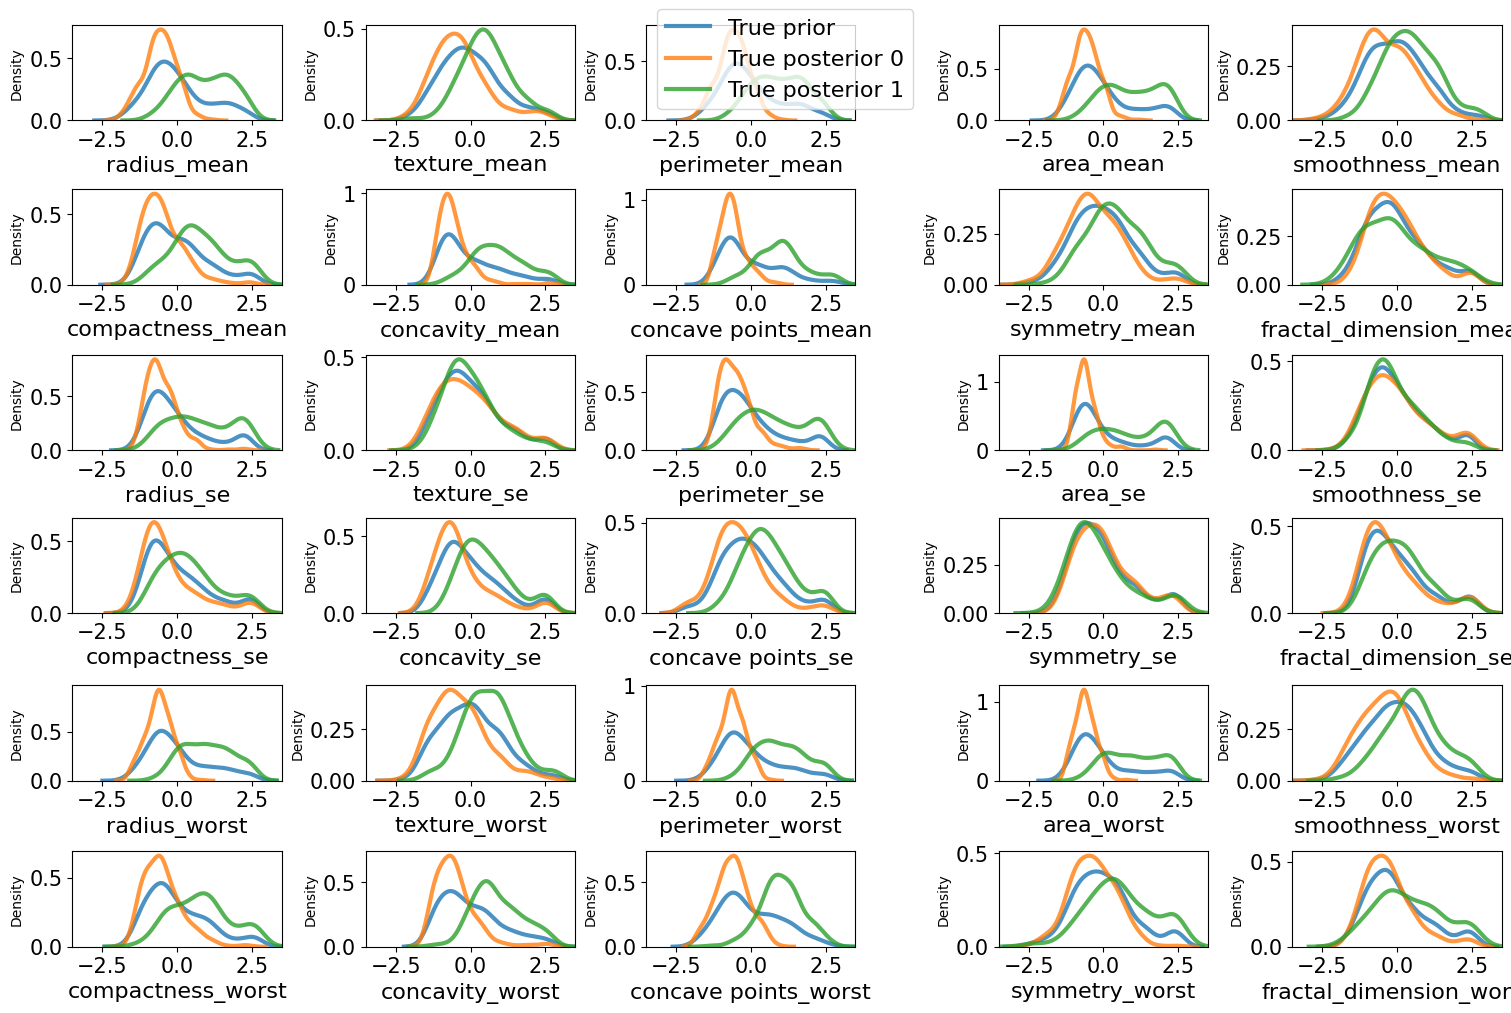

In [ ]:
# Set up the plot layout
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Define the indices of the attributes to be plotted
attribute_indices = [0, 2, 4, 6, 8, 11, 14, 17, 20]
selected_predictor_columns = predictor_columns

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[dataset_df['diagnosis'] == 0], x=col_name, ax=axes[row, col], label='True posterior 0', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[dataset_df['diagnosis'] == 1], x=col_name, ax=axes[row, col], label='True posterior 1', linewidth=3, alpha=0.8)

    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Add vertical lines at the mean of each attribute
    #axes[row, col].axvline(predictor_info[i]['mean'], linestyle='--', color='black', label='Mean')
    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

#plt.suptitle('KDE Plots of Predictor Attributes (Normalized)', fontsize=20)
plt.show()

In [ ]:
# Set up the plot layout

prior_KLDs = []

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):


    # Plot uniform prior distribution
    true_prior_x = predictor_info[i]['pdf'](x)

    KLD_value = entropy(true_prior_x, uniform_prior_x)
    prior_KLDs.append(KLD_value)

prior_KLDs = np.array(prior_KLDs)

In [ ]:
# Get the indices that would sort the KLD values in descending order
prior_KLDs_sorted_indices = np.argsort(prior_KLDs)

# Display the indices order associated with descending order of KLD values
print("Indices order associated with descending order of KLD values:")
print(prior_KLDs_sorted_indices)

Indices order associated with descending order of KLD values:
[24  8  4 21 28  1 17 27  9 11 29  0  2  5 26 25 16 14 22 20 18 19 15  6
  3  7 12 10 23 13]


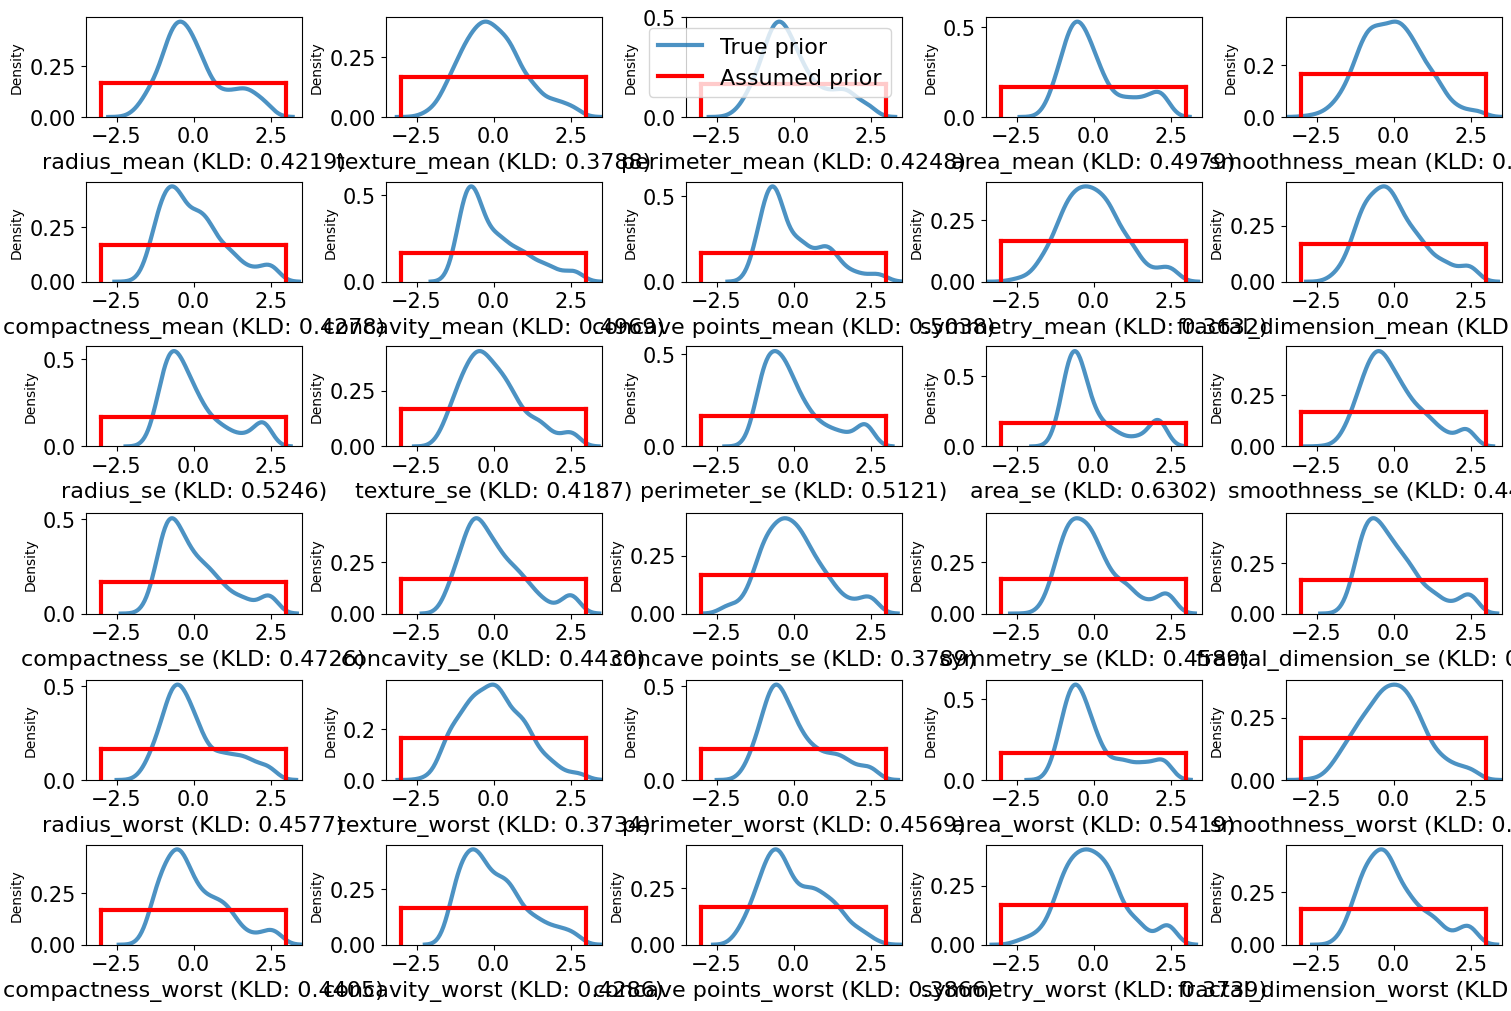

In [ ]:
# Set up the plot layout
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)

    # Plot uniform prior distribution
    uniform_height = 1 / 6
    uniform_x = np.linspace(-3,3,100)
    uniform_y = np.full_like(uniform_x, uniform_height)
    axes[row, col].plot(uniform_x, uniform_y, label='Assumed prior', color='red', linewidth=3)

    max_uniform_y = uniform_height / axes[row, col].get_ylim()[1]

    # Add vertical lines on the left and right ends of the uniform distribution
    axes[row, col].axvline(x=-3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)
    axes[row, col].axvline(x=3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)


    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Display JSD value and attribute name as the title
    axes[row, col].set_xlabel(f'{col_name} (KLD: {prior_KLDs[i]:.4f})', fontsize=16)
    #axes[row, col].set_xlabel(col_name, fontsize=16)


    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

plt.show()

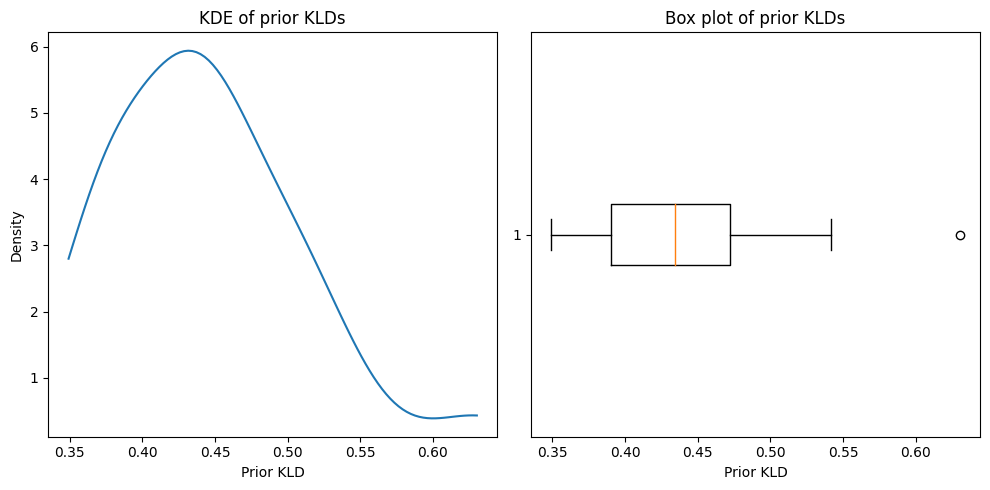

In [ ]:
# Create a figure with subplots for KDE and box plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot KDE of prior KLDs
kde = gaussian_kde(prior_KLDs)
y = np.linspace(min(prior_KLDs), max(prior_KLDs), 100)
ax1.plot(y, kde(y))
ax1.set_xlabel('Prior KLD')
ax1.set_ylabel('Density')
ax1.set_title('KDE of prior KLDs')

# Plot box plot of prior KLDs
ax2.boxplot(prior_KLDs, vert=False)
ax2.set_xlabel('Prior KLD')
ax2.set_title('Box plot of prior KLDs')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy, gaussian_kde


def proposal_within_range(current_params, scale):
    proposed_params = current_params + np.random.normal(0, scale, len(current_params))

    while not np.all(np.logical_and(-3 <= proposed_params, proposed_params <= 3)):
        idx_outside_range = np.where(np.logical_or(proposed_params < -3, proposed_params > 3))[0]
        proposed_params[idx_outside_range] = current_params[idx_outside_range] + np.random.normal(0, scale, len(idx_outside_range))

    return proposed_params



# Log Prior distribution
def log_uniform_prior(params):
    log_joint_probability = 0

    for i, param in enumerate(params):
        log_joint_probability += np.log(1/6)

    return log_joint_probability



# Likelihood function
def log_likelihood(params, data):
    feature_values = {col_name: [value] for col_name, value in zip(column_index_map.values(), params)}
    X_new = pd.DataFrame(feature_values)

    if data == 1:
        return np.log(ml.predict_proba(X_new)[0, 1])
    else:
        return np.log(1 - ml.predict_proba(X_new)[0, 1])



# Metropolis-Hastings MCMC algorithm
def metropolis_hastings(num_samples, initial_params, data):
    np.random.seed(42)

    current_params = initial_params
    accepted_params = [[] for _ in range(len(initial_params))]

    current_log_posterior = log_uniform_prior(current_params) + log_likelihood(current_params, data)

    iter = 0
    num_accepted = 0

    while num_accepted < num_samples:
        # Generate proposed params until likelihood >= 0.8
        proposed_params = np.zeros_like(current_params)
        proposed_likelihood = -np.inf

        iter = iter + 1

        num_proposing = 0
        while proposed_likelihood < np.log(0.5):
            num_proposing = num_proposing + 1
            proposed_params = proposal_within_range(current_params, 1)
            proposed_likelihood = log_likelihood(proposed_params, data)

        # Calculate acceptance probability
        proposed_log_posterior = log_uniform_prior(proposed_params) + proposed_likelihood
        acceptance_probability = np.exp(proposed_log_posterior - current_log_posterior)


        # Accept or reject the proposed parameter
        if np.random.rand() < acceptance_probability:
            num_accepted = num_accepted + 1

            if num_accepted % 1000 == 0:
                print("Num samples accepted: ", num_accepted)

            current_params = proposed_params
            current_log_posterior = proposed_log_posterior
            for i, param in enumerate(current_params):
                accepted_params[i].append(param)

    return accepted_params

In [ ]:
# Configuration settings for running MCMC and saving samples

run_MCMC = True
save_samples = True

data_shifts = [0, -0.2, -0.4, -0.6, -0.8, -1, 0.2, 0.4, 0.6, 0.8, 1]

samples_0_file_name = 'WBCD_DNN_class_0_samples.pickle'
samples_1_file_name = 'WBCD_DNN_class_1_samples.pickle'

In [ ]:
class0_samples = []
class1_samples = []

original_training_accuracies = []
original_test_accuracies = []

for shift in data_shifts:

    print('\n\n\nInverse estimation for data with shift ', shift)

    # Shift every value in the DataFrame to the right
    X_train_shifted = X_train.add(shift)


    # Resample the training set using RandomOverSampler to address class imbalance
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_shifted, y_train)



    print('\nModel evaluation on training set:')

    # Initialize Random Forest classifier

    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_train, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    original_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)



    print('\nModel evaluation on test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    original_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    if run_MCMC:

        # Run MCMC
        num_samples = 5000
        initial_params = np.zeros(num_predictor_columns)

        print('\nMCMC for class 0')
        accepted_params_zero = metropolis_hastings(num_samples, initial_params, 0)
        class0_samples.append(accepted_params_zero)

        print('\nMCMC for class 1')
        accepted_params_one = metropolis_hastings(num_samples, initial_params, 1)
        class1_samples.append(accepted_params_one)

if save_samples:

    # Save the list to a file
    with open(samples_0_file_name, 'wb') as f:
        pickle.dump(class0_samples, f)

    files.download(samples_0_file_name)

    # Save the list to a file
    with open(samples_1_file_name, 'wb') as f:
        pickle.dump(class1_samples, f)

    files.download(samples_1_file_name)

if ~ run_MCMC:
    # Load the list from the file
    with open(samples_0_file_name, 'rb') as f:
        class0_samples = pickle.load(f)

    with open(samples_1_file_name, 'rb') as f:
        class1_samples = pickle.load(f)

original_training_accuracies = np.array(original_training_accuracies)
original_test_accuracies = np.array(original_test_accuracies)





Inverse estimation for data with shift  0

Model evaluation on training set:
Confusion Matrix:
[[317   0]
 [  0 195]]
Precision: 1.0
Recall: 1.0
AUC ROC: 1.0
Cohen Kappa Score: 1.0
Accuracy: 1.0
Geometric Mean Score: 1.0

Model evaluation on test set:
Confusion Matrix:
[[40  0]
 [ 1 16]]
Precision: 1.0
Recall: 0.9411764705882353
AUC ROC: 0.9882352941176471
Cohen Kappa Score: 0.9573672400897532
Accuracy: 0.9824561403508771
Geometric Mean Score: 0.970142500145332

MCMC for class 0
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000

MCMC for class 1
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000



Inverse estimation for data with shift  -0.2

Model evaluation on training set:
Confusion Matrix:
[[297  20]
 [  0 195]]
Precision: 0.9069767441860465
Recall: 1.0
AUC ROC: 0.9999352907870258
Cohen Kappa Score: 0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
accepted_params_zero = class0_samples[0]
accepted_params_one = class1_samples[0]

In [ ]:
# Define the est_posterior function with list comprehension
def est_posterior(a, prob, bins):
    return np.array([prob[np.digitize(val, bins) - 1] if (val > np.min(bins)) and (val < np.max(bins) and (prob[np.digitize(val, bins) - 1] != 0)) else 1e-9 for val in a])

In [ ]:
avg_posterior_KLDs = []


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    prob, bins = np.histogram(accepted_params_one[i], bins=100, density=True)
    est_post1 = est_posterior(x, prob, bins)


     # Posterior histogram
    prob, bins = np.histogram(accepted_params_zero[i], bins=100, density=True)
    est_post0 = est_posterior(x, prob, bins)


     # Prior distribution
    true_posterior1_x = predictor_info[i]['pdf1'](x)

    # Prior distribution
    true_posterior0_x = predictor_info[i]['pdf0'](x)

    avg_KLD_value = 0.5*entropy(true_posterior0_x, est_post0) + 0.5*entropy(true_posterior1_x, est_post1)
    avg_posterior_KLDs.append(avg_KLD_value)


avg_posterior_KLDs = np.array(avg_posterior_KLDs)

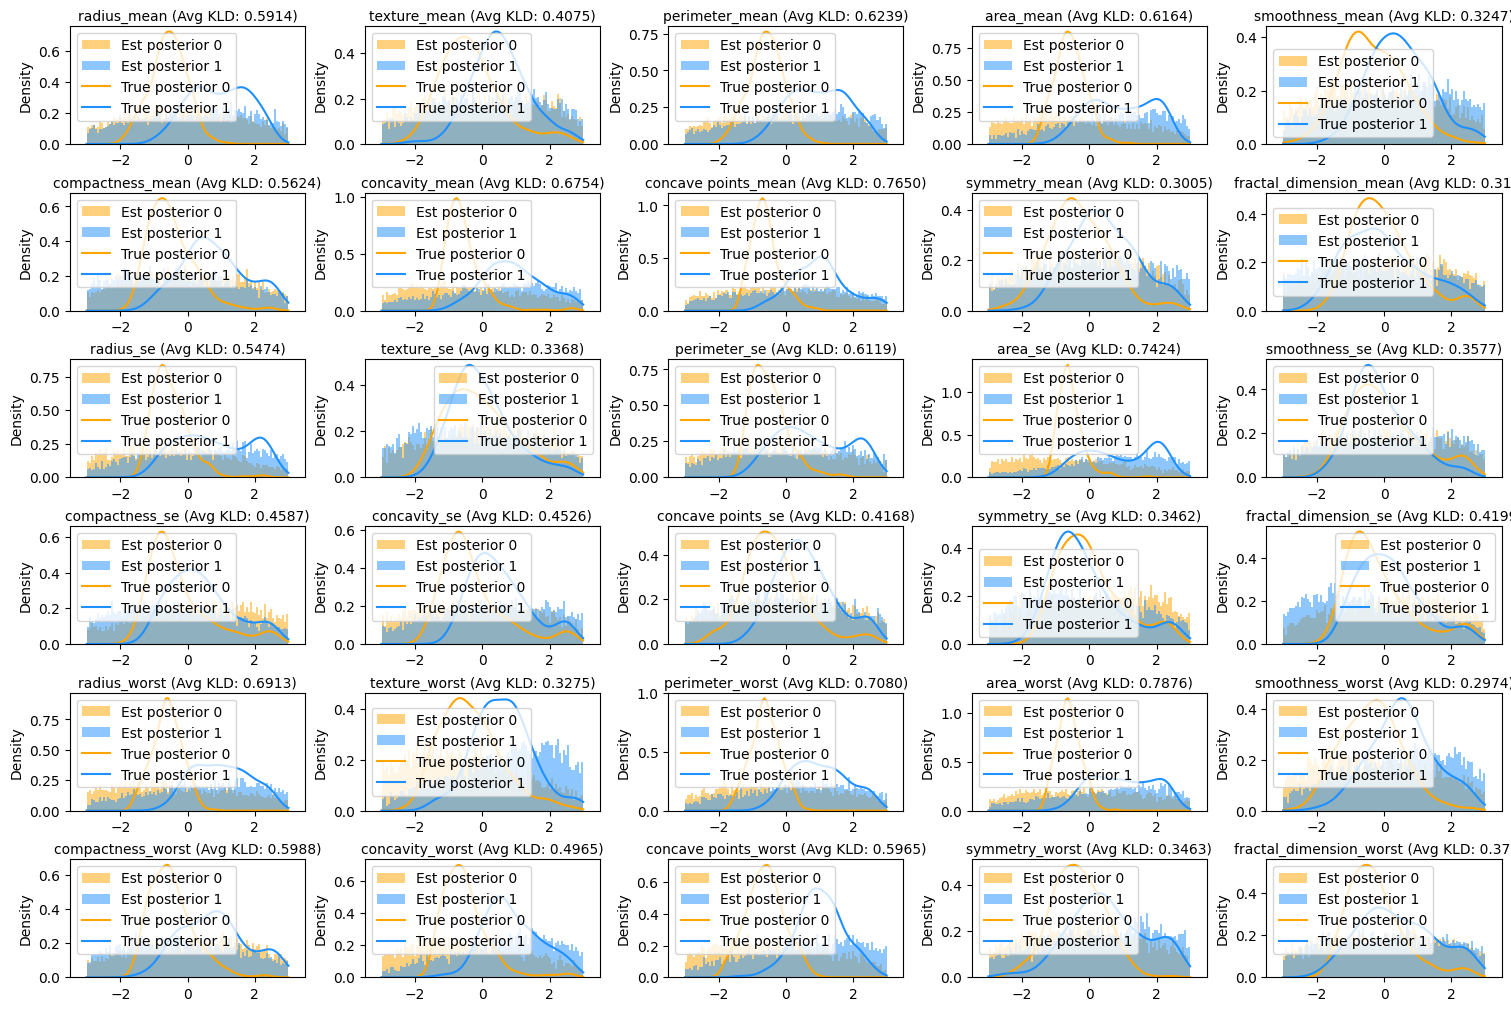

In [ ]:
# Set up the plot layout
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    post0, bins0, _ = axes[row, col].hist(accepted_params_zero[i], bins=100, density=True, alpha=0.5, label='Est posterior 0', color='orange')
    post1, bins1, _ = axes[row, col].hist(accepted_params_one[i], bins=100, density=True, alpha=0.5, label='Est posterior 1', color='dodgerblue')

    # Prior distribution
    posterior0_x = predictor_info[i]['pdf0'](x)
    axes[row, col].plot(x, posterior0_x, label='True posterior 0', color='orange')

     # Prior distribution
    posterior1_x = predictor_info[i]['pdf1'](x)
    axes[row, col].plot(x, posterior1_x, label='True posterior 1', color='dodgerblue')

    axes[row, col].xaxis.set_label_position('top')
    axes[row, col].set_xlim(-3.5, 3.5)
    axes[row, col].set_xlabel(f'{col_name} (Avg KLD: {avg_posterior_KLDs[i]:.4f})')
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()

plt.show()

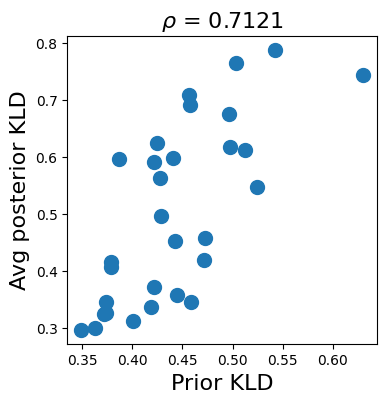

In [ ]:
avg_post_KLDs_all_params = []

for i, shift in enumerate(data_shifts):

    #print('\n\n\nPrior JSD vs  Avg posterior KLD for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)


    avg_posterior_KLDs = []


    # Plot the KDEs for each attribute and class
    for j, col_name in enumerate(predictor_columns):
        row = j // ncols
        col = j % ncols

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_one[j], bins=100, density=True)
        est_post1 = est_posterior(x, prob, bins)


        # Posterior histogram
        prob, bins = np.histogram(accepted_params_zero[j], bins=100, density=True)
        est_post0 = est_posterior(x, prob, bins)


        # Prior distribution
        true_posterior1_x = predictor_info[j]['pdf1'](x)

        # Prior distribution
        true_posterior0_x = predictor_info[j]['pdf0'](x)

        avg_KLD_value = 0.5*entropy(true_posterior0_x, est_post0) + 0.5*entropy(true_posterior1_x, est_post1)
        avg_posterior_KLDs.append(avg_KLD_value)


    avg_posterior_KLDs = np.array(avg_posterior_KLDs)
    avg_post_KLDs_all_params.append(np.mean(avg_posterior_KLDs))


    if shift==0:
        plt.figure(figsize=(4, 4))

        # Create a scatter plot of the two sets of importance values
        plt.scatter(prior_KLDs, avg_posterior_KLDs, s=100)


        # Calculate the correlation coefficient between the two sets of importance values
        correlation_coefficient = np.corrcoef(prior_KLDs, avg_posterior_KLDs)[0, 1]

        # Set the axis labels and title
        plt.xlabel('Prior KLD', fontsize=16)
        plt.ylabel('Avg posterior KLD', fontsize=16)
        plt.title('$\\rho$ = {:.4f}'.format(correlation_coefficient), fontsize=16)

        # Display the plot
        plt.show()

avg_post_KLDs_all_params = np.array(avg_post_KLDs_all_params)


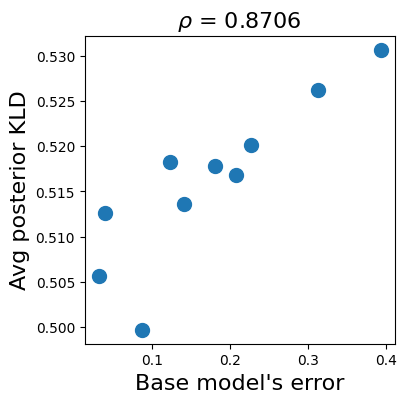

In [ ]:
plt.figure(figsize=(4, 4))

# Create a scatter plot of the two sets of importance values
plt.scatter(1-original_training_accuracies[1:], avg_post_KLDs_all_params[1:], s=100)


# Calculate the correlation coefficient between the two sets of importance values
training_correlation_coefficient = np.corrcoef(1-original_training_accuracies[1:], avg_post_KLDs_all_params[1:])[0, 1]

# Set the axis labels and title
plt.xlabel('Base model\'s error', fontsize=16)
plt.ylabel('Avg posterior KLD', fontsize=16)
plt.title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Display the plot
plt.show()


In [ ]:
synthetic_training_accuracies = []
synthetic_test_accuracies = []

for i, shift in enumerate(data_shifts):

    print('\n\n\nSynthetic models for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)

    # Concatenate accepted_params_one and accepted_params_zero along the rows axis
    simulated_dataset = np.concatenate((accepted_params_one, accepted_params_zero), axis=1)

    # Transpose the dataset to have 2000 records and 15 predictor attributes
    simulated_dataset = simulated_dataset.T

    # Create an array of class labels (1 for class 1 and 0 for class 0)
    class_labels = np.concatenate((np.ones(accepted_params_one.shape[1]), np.zeros(accepted_params_zero.shape[1])))

    # Add the class labels as the 16th attribute
    simulated_dataset = np.column_stack((simulated_dataset, class_labels))

    data_columns = [col for col in dataset_df.columns]

    # Convert binary_dataset to a DataFrame
    simulated_dataset_df = pd.DataFrame(simulated_dataset)

    # Rename the columns of simulated_dataset_df to match dataset_df
    simulated_dataset_df.columns = dataset_df.columns

    # Check the first few rows of simulated_dataset_df
    simulated_dataset_df

    # Separate target variable from features
    sim_train_y = simulated_dataset_df["diagnosis"]
    sim_train_X = simulated_dataset_df.drop("diagnosis", axis=1)

    print('\nSynthetic model evaluation on original training set:')

    # Initialize Random Forest classifier
    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(sim_train_X, sim_train_y)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_train, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    synthetic_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    print('\nSynthetic model evaluation on original test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    synthetic_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


synthetic_training_accuracies = np.array(synthetic_training_accuracies)
synthetic_test_accuracies = np.array(synthetic_test_accuracies)




Synthetic models for data with shift  0

Synthetic model evaluation on original training set:
Confusion Matrix:
[[317   0]
 [  3 192]]
Precision: 1.0
Recall: 0.9846153846153847
AUC ROC: 0.9993205532637709
Cohen Kappa Score: 0.9875389408099688
Accuracy: 0.994140625
Geometric Mean Score: 0.9922778767136677

Synthetic model evaluation on original test set:
Confusion Matrix:
[[40  0]
 [ 1 16]]
Precision: 1.0
Recall: 0.9411764705882353
AUC ROC: 0.9941176470588236
Cohen Kappa Score: 0.9573672400897532
Accuracy: 0.9824561403508771
Geometric Mean Score: 0.970142500145332



Synthetic models for data with shift  -0.2

Synthetic model evaluation on original training set:
Confusion Matrix:
[[299  18]
 [  1 194]]
Precision: 0.9150943396226415
Recall: 0.9948717948717949
AUC ROC: 0.9988837660761951
Cohen Kappa Score: 0.9226118500604595
Accuracy: 0.962890625
Geometric Mean Score: 0.9687004965134068

Synthetic model evaluation on original test set:
Confusion Matrix:
[[39  1]
 [ 1 16]]
Precision: 0.

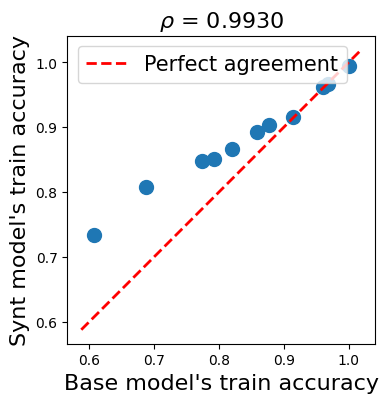

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the training accuracy values
ax.scatter(original_training_accuracies[:], synthetic_training_accuracies[:], s=100)

# Calculate the correlation coefficient between the training accuracy values
training_correlation_coefficient = np.corrcoef(original_training_accuracies[:], synthetic_training_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's train accuracy", fontsize=16)
ax.set_ylabel("Synt model's train accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red', label='Perfect agreement')


# Add a legend to the plot
ax.legend(fontsize=15)

# Display the plot
plt.show()

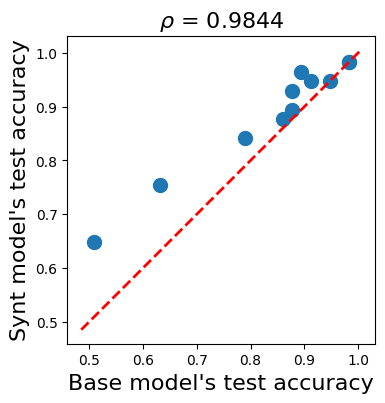

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the test accuracy values
ax.scatter(original_test_accuracies[:], synthetic_test_accuracies[:], s=100)

# Calculate the correlation coefficient between the test accuracy values
test_correlation_coefficient = np.corrcoef(original_test_accuracies[:], synthetic_test_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's test accuracy", fontsize=16)
ax.set_ylabel("Synt model's test accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(test_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red')


# Display the plot
plt.show()